In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

# DATA EXPLORATION

In [3]:
# Dataset : https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality

df = pd.read_csv('apple_quality.csv')
df.head(2)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809367,good


In [4]:
# Melihat apakah ada data null

df.isna().any()

A_id            True
Size            True
Weight          True
Sweetness       True
Crunchiness     True
Juiciness       True
Ripeness        True
Acidity        False
Quality         True
dtype: bool

In [5]:
# Drop data null

df = df.dropna()

In [6]:
# Melihat apakah masih ada data null

df.isna().any()

A_id           False
Size           False
Weight         False
Sweetness      False
Crunchiness    False
Juiciness      False
Ripeness       False
Acidity        False
Quality        False
dtype: bool

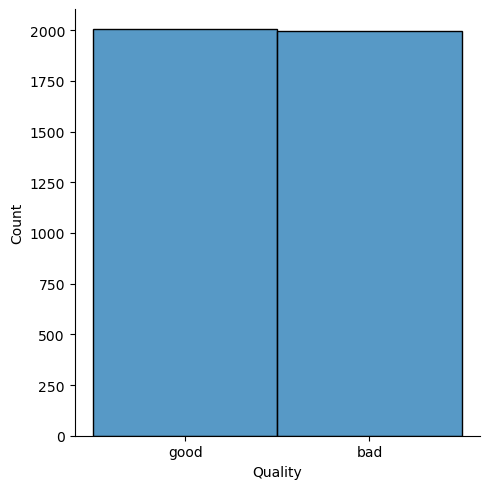

In [7]:
# Melihat kualitas apel
import seaborn as sns

sns.displot(data = df, x = 'Quality')

In [8]:
# Drop id

df.drop('A_id', axis = 1, inplace = True)
df.head(2)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809367,good


In [9]:
df['Kualitas_Bagus'] = df['Quality'].apply(lambda x : 1 if x == 'good' else 0)
df.drop('Quality', axis = 1, inplace = True)
df.head(2)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Kualitas_Bagus
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809367,1


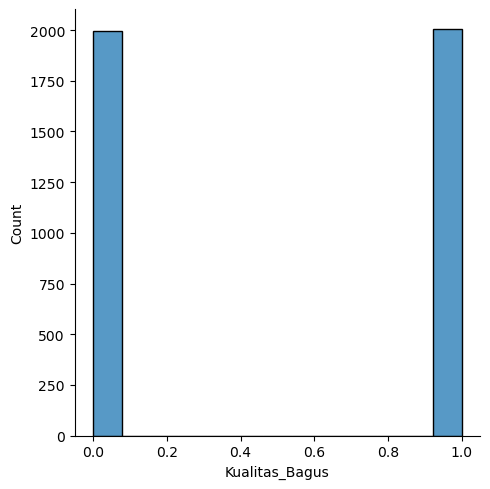

In [10]:
sns.displot(data = df, x = 'Kualitas_Bagus')

In [11]:
x = df.drop('Kualitas_Bagus', axis = 1)
y = df['Kualitas_Bagus']

# MODELING

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [13]:
# Membuat fungsi untuk running beberapa model
from sklearn.model_selection import cross_val_score

def crossValModel(nama_model, x, y):
    nama_model = nama_model
    nama_model.fit(x, y)
    print(f'Cross validation skor: {cross_val_score(nama_model, x, y)}')

In [14]:
# Import model klasifikasi yang akan dipakai

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model._stochastic_gradient import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [15]:
# Melihat cross-val-score dari beberapa model

print('Random Forest Classifier')
crossValModel(RandomForestClassifier(), x_train, y_train)
print('\nSVM')
crossValModel(SVC(), x_train, y_train)
print('\nDecision Tree Classifier')
crossValModel(DecisionTreeClassifier(), x_train, y_train)
print('\nSGDC Classifier')
crossValModel(SGDClassifier(), x_train, y_train)
print('\nMLP Classifier')
crossValModel(MLPClassifier(max_iter = 3000), x_train, y_train)
print('\nGaussian Naive Beyes')
crossValModel(GaussianNB(), x_train, y_train)

Random Forest Classifier
Cross validation skor: [0.884375  0.8546875 0.8640625 0.8984375 0.8859375]

SVM
Cross validation skor: [0.9       0.86875   0.8609375 0.89375   0.8828125]

Decision Tree Classifier
Cross validation skor: [0.79375   0.7703125 0.7953125 0.796875  0.790625 ]

SGDC Classifier
Cross validation skor: [0.7484375 0.6765625 0.671875  0.628125  0.703125 ]

MLP Classifier
Cross validation skor: [0.9359375 0.946875  0.9125    0.9359375 0.93125  ]

Gaussian Naive Beyes
Cross validation skor: [0.7453125 0.7578125 0.73125   0.771875  0.7296875]


In [16]:
model = MLPClassifier(max_iter = 3000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Evaluasi

In [17]:
from sklearn.metrics import classification_report

print(f'Laporan Klasifikasi Model\n{classification_report(y_true = y_test, y_pred = y_pred)}')

Laporan Klasifikasi Model
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       397
           1       0.96      0.97      0.96       403

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



Text(70.72222222222221, 0.5, 'Kenyataannya')

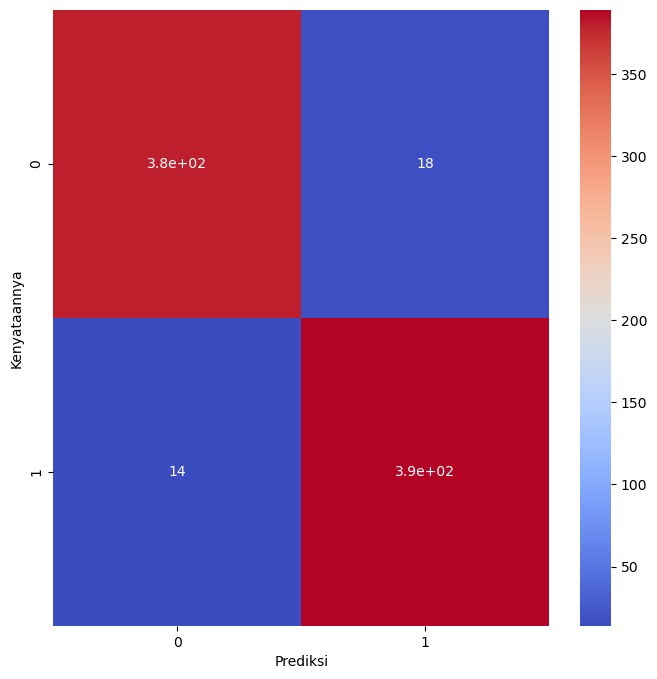

In [18]:
# Menggunakan confusion matrix untuk visualisasi prediksi

import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_nm = confusion_matrix(y_test, y_pred)


plt.figure(figsize = (8, 8))
sn.heatmap(cm_nm, annot = True, cmap = 'coolwarm')
plt.xlabel('Prediksi')
plt.ylabel('Kenyataannya')

In [19]:
# RMSE

from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

RMSE = root_mean_squared_error(y_test, y_pred)
RMSELog = root_mean_squared_log_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print(f'RMSE : {RMSE}\nRMSE Log : {RMSELog}\nMSE : {MSE}\nMAE : {MAE}')

RMSE : 0.2
RMSE Log : 0.13862943611198905
MSE : 0.04
MAE : 0.04
